# Introduction to geobr

The [**geobr**](https://github.com/ipeaGIT/geobr) package provides quick and easy access to official spatial data sets of Brazil. The syntax of all **geobr** functions operate on a simple logic that allows users to easily download a wide variety of data sets with updated geometries and harmonized attributes and geographic projections across geographies and years. This vignette presents a quick intro to **geobr**.

## Installation

You can install geobr from PyPI:

`pip install geobr`

Now let's load the libraries we'll use in this vignette.

In [1]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## General usage

### Available data sets

The geobr package covers 21 spatial data sets, including a variety of political-administrative and statistical areas used in Brazil. You can view what data sets are available using the `list_geobr()` function.

In [2]:
# Available data sets
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019
Source: IBGE
----------------

## Download spatial data as `GeoDataFrames`

The syntax of all *geobr* functions operate on the same logic, so the code to download the data becomes intuitive for the user. Here are a few examples.

Download a specific geographic area at a given year

In [ ]:
# State of Sergige
state = geobr.read_state(code_state="SE", year=2018)
# Municipality of Sao Paulo
muni = geobr.read_municipality(code_muni=3550308, year=2010)

Download all geographic areas within a state at a given year


In [ ]:
# All municipalities in the state of Alagoas
muni = geobr.read_municipality(code_muni="AL", year=2007)

# All census tracts in the state of Rio de Janeiro
cntr = geobr.read_census_tract(code_tract="RJ", year=2010)

If the parameter `code_` is not passed to the function, geobr returns the data for the whole country by default.

In [ ]:
states = geobr.read_state(year=2019)

## Important note about data resolution

All functions to download polygon data such as states, municipalites etc. have a `simplified` argument. When `simplified=False`, geobr will return the original data set with high resolution at detailed geographic scale (see documentation). By default, however, `simplified=True` and geobr returns data set geometries with simplified borders to improve speed of downloading and plotting the data.

## Plot the data


Once you've downloaded the data, it is really simple to plot maps using `matplotlib`.

(-76.24758052685, -26.590708254149995, -35.70232894755864, 7.22299203073151)

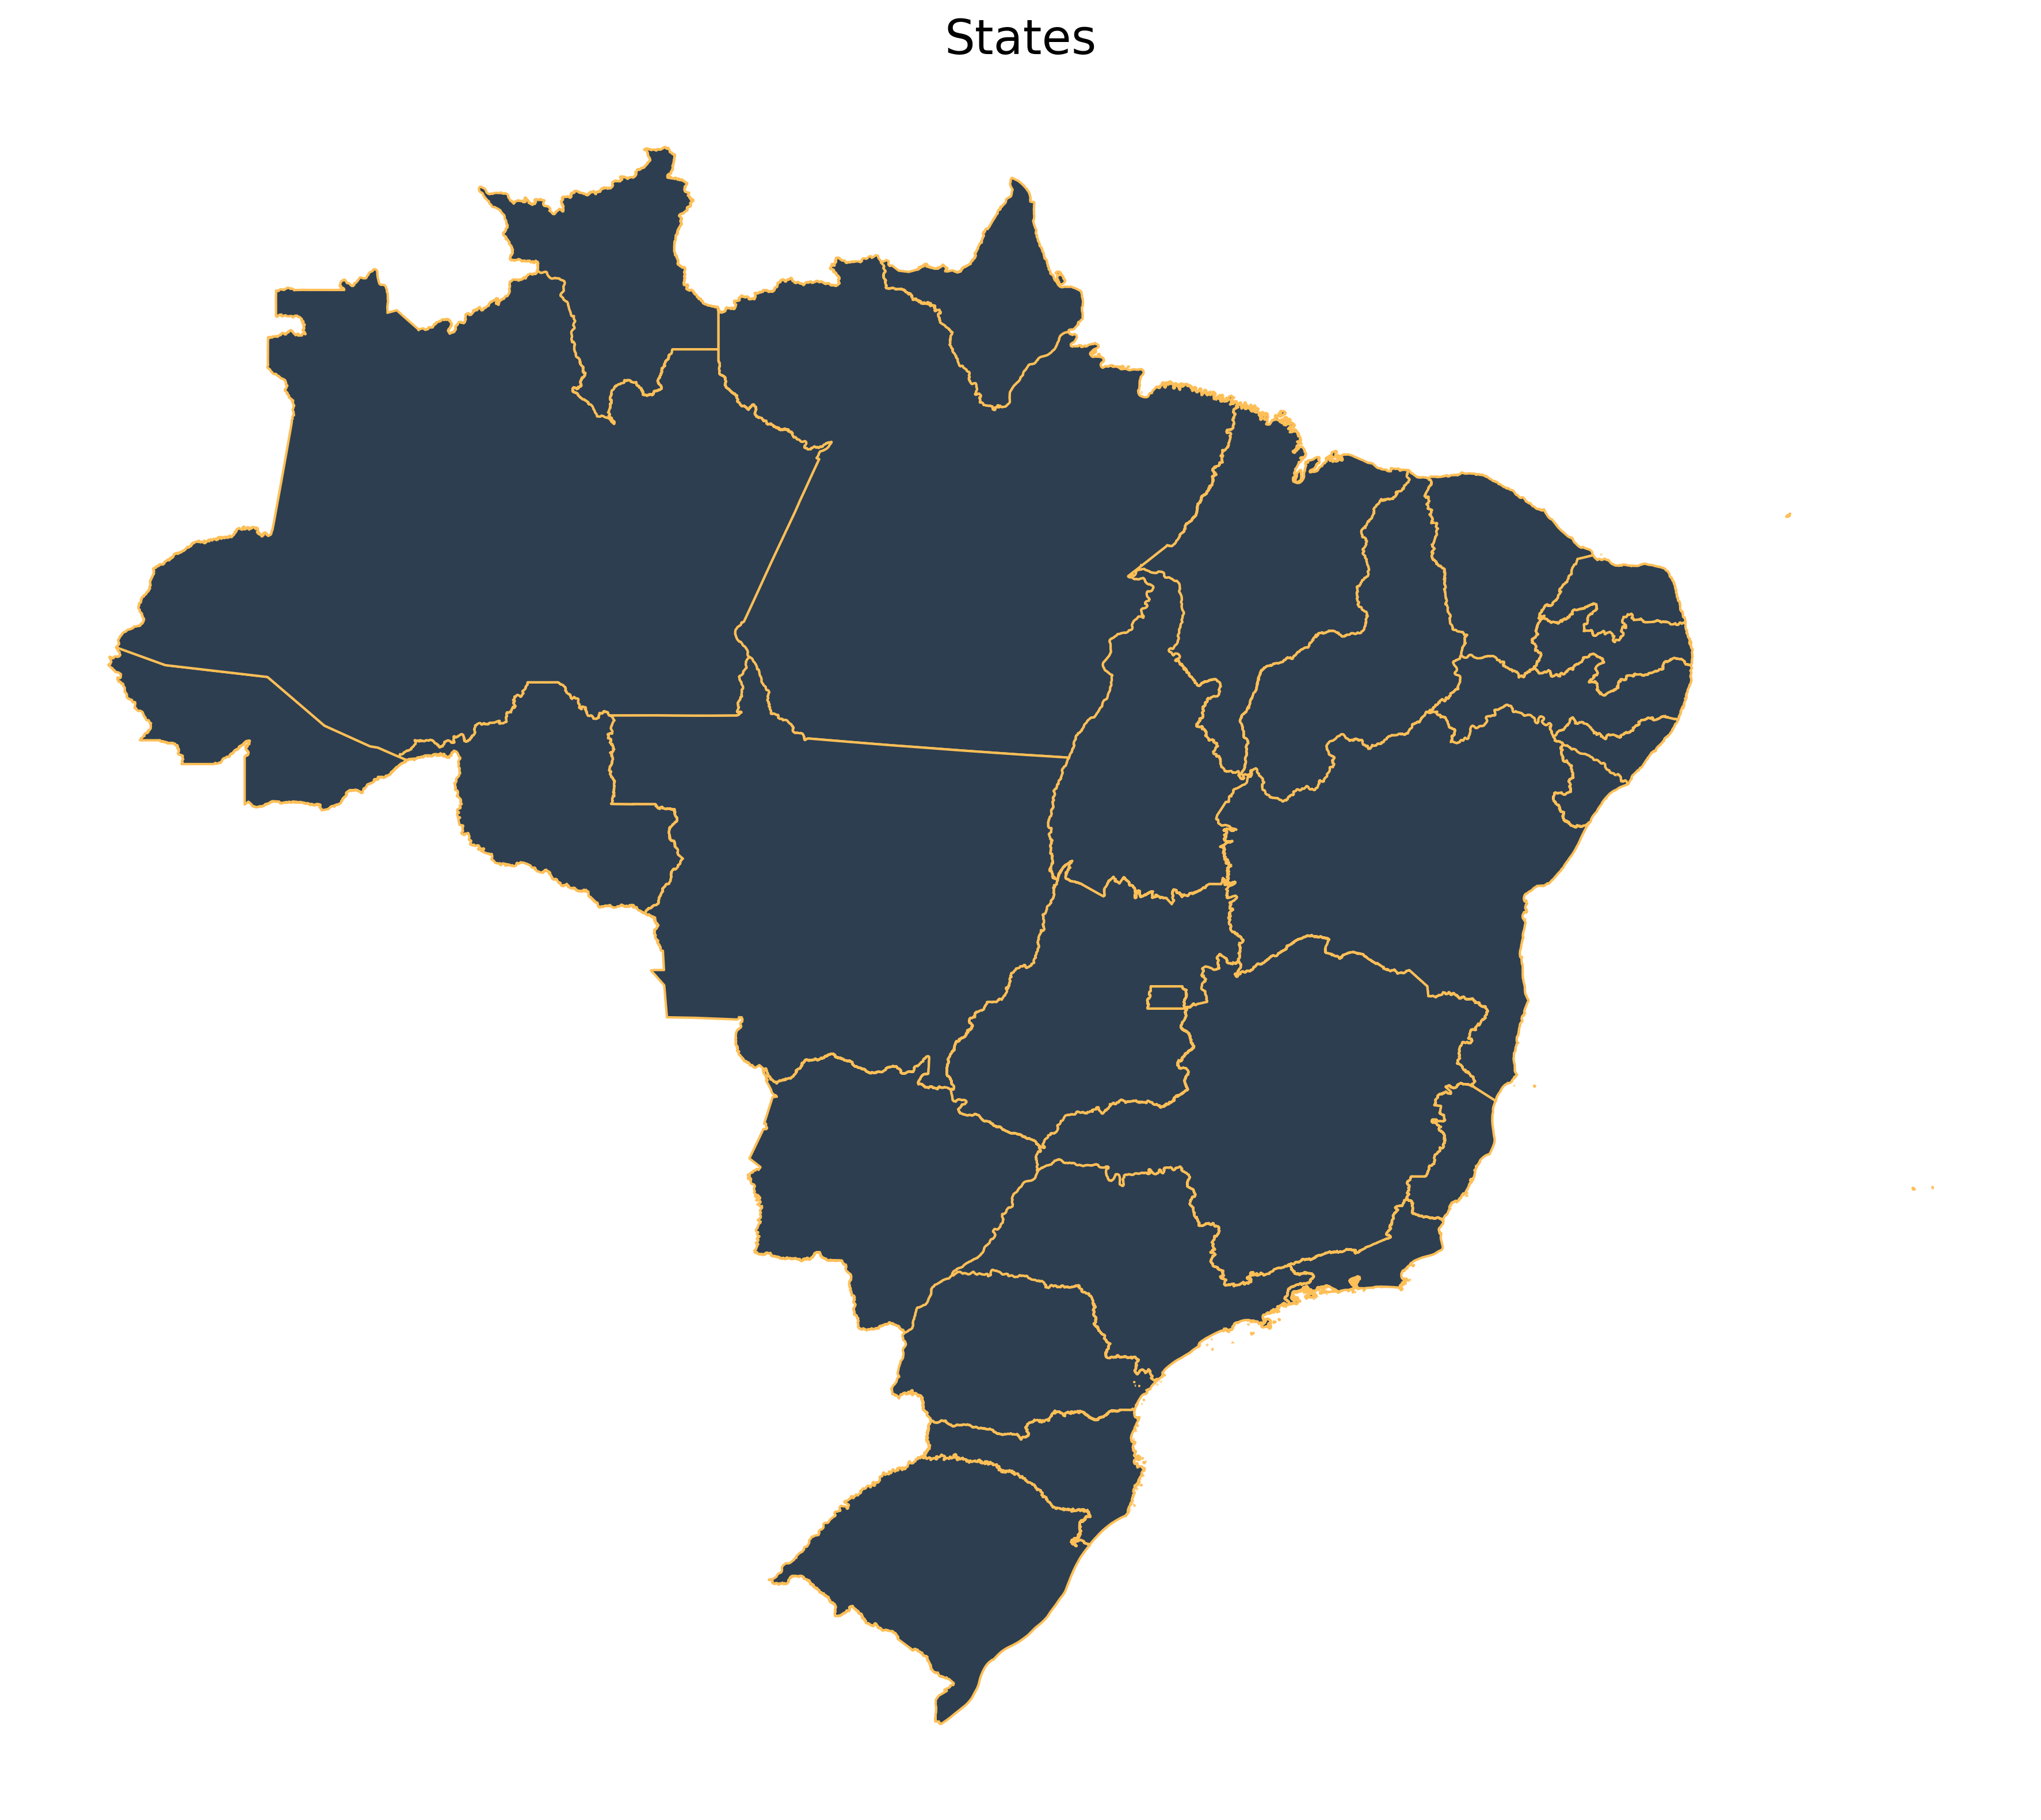

In [6]:
# Plot all Brazilian states
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

states.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("States", fontsize=20)
ax.axis("off")

Plot all the municipalities of a particular state, such as Rio de Janeiro:

In [ ]:
# Download all municipalities of Rio
all_muni = geobr.read_municipality(code_muni="RJ", year=2010)

(-45.08586065211478,
 -40.7619784166046,
 -23.499218287945578,
 -20.632919136978526)

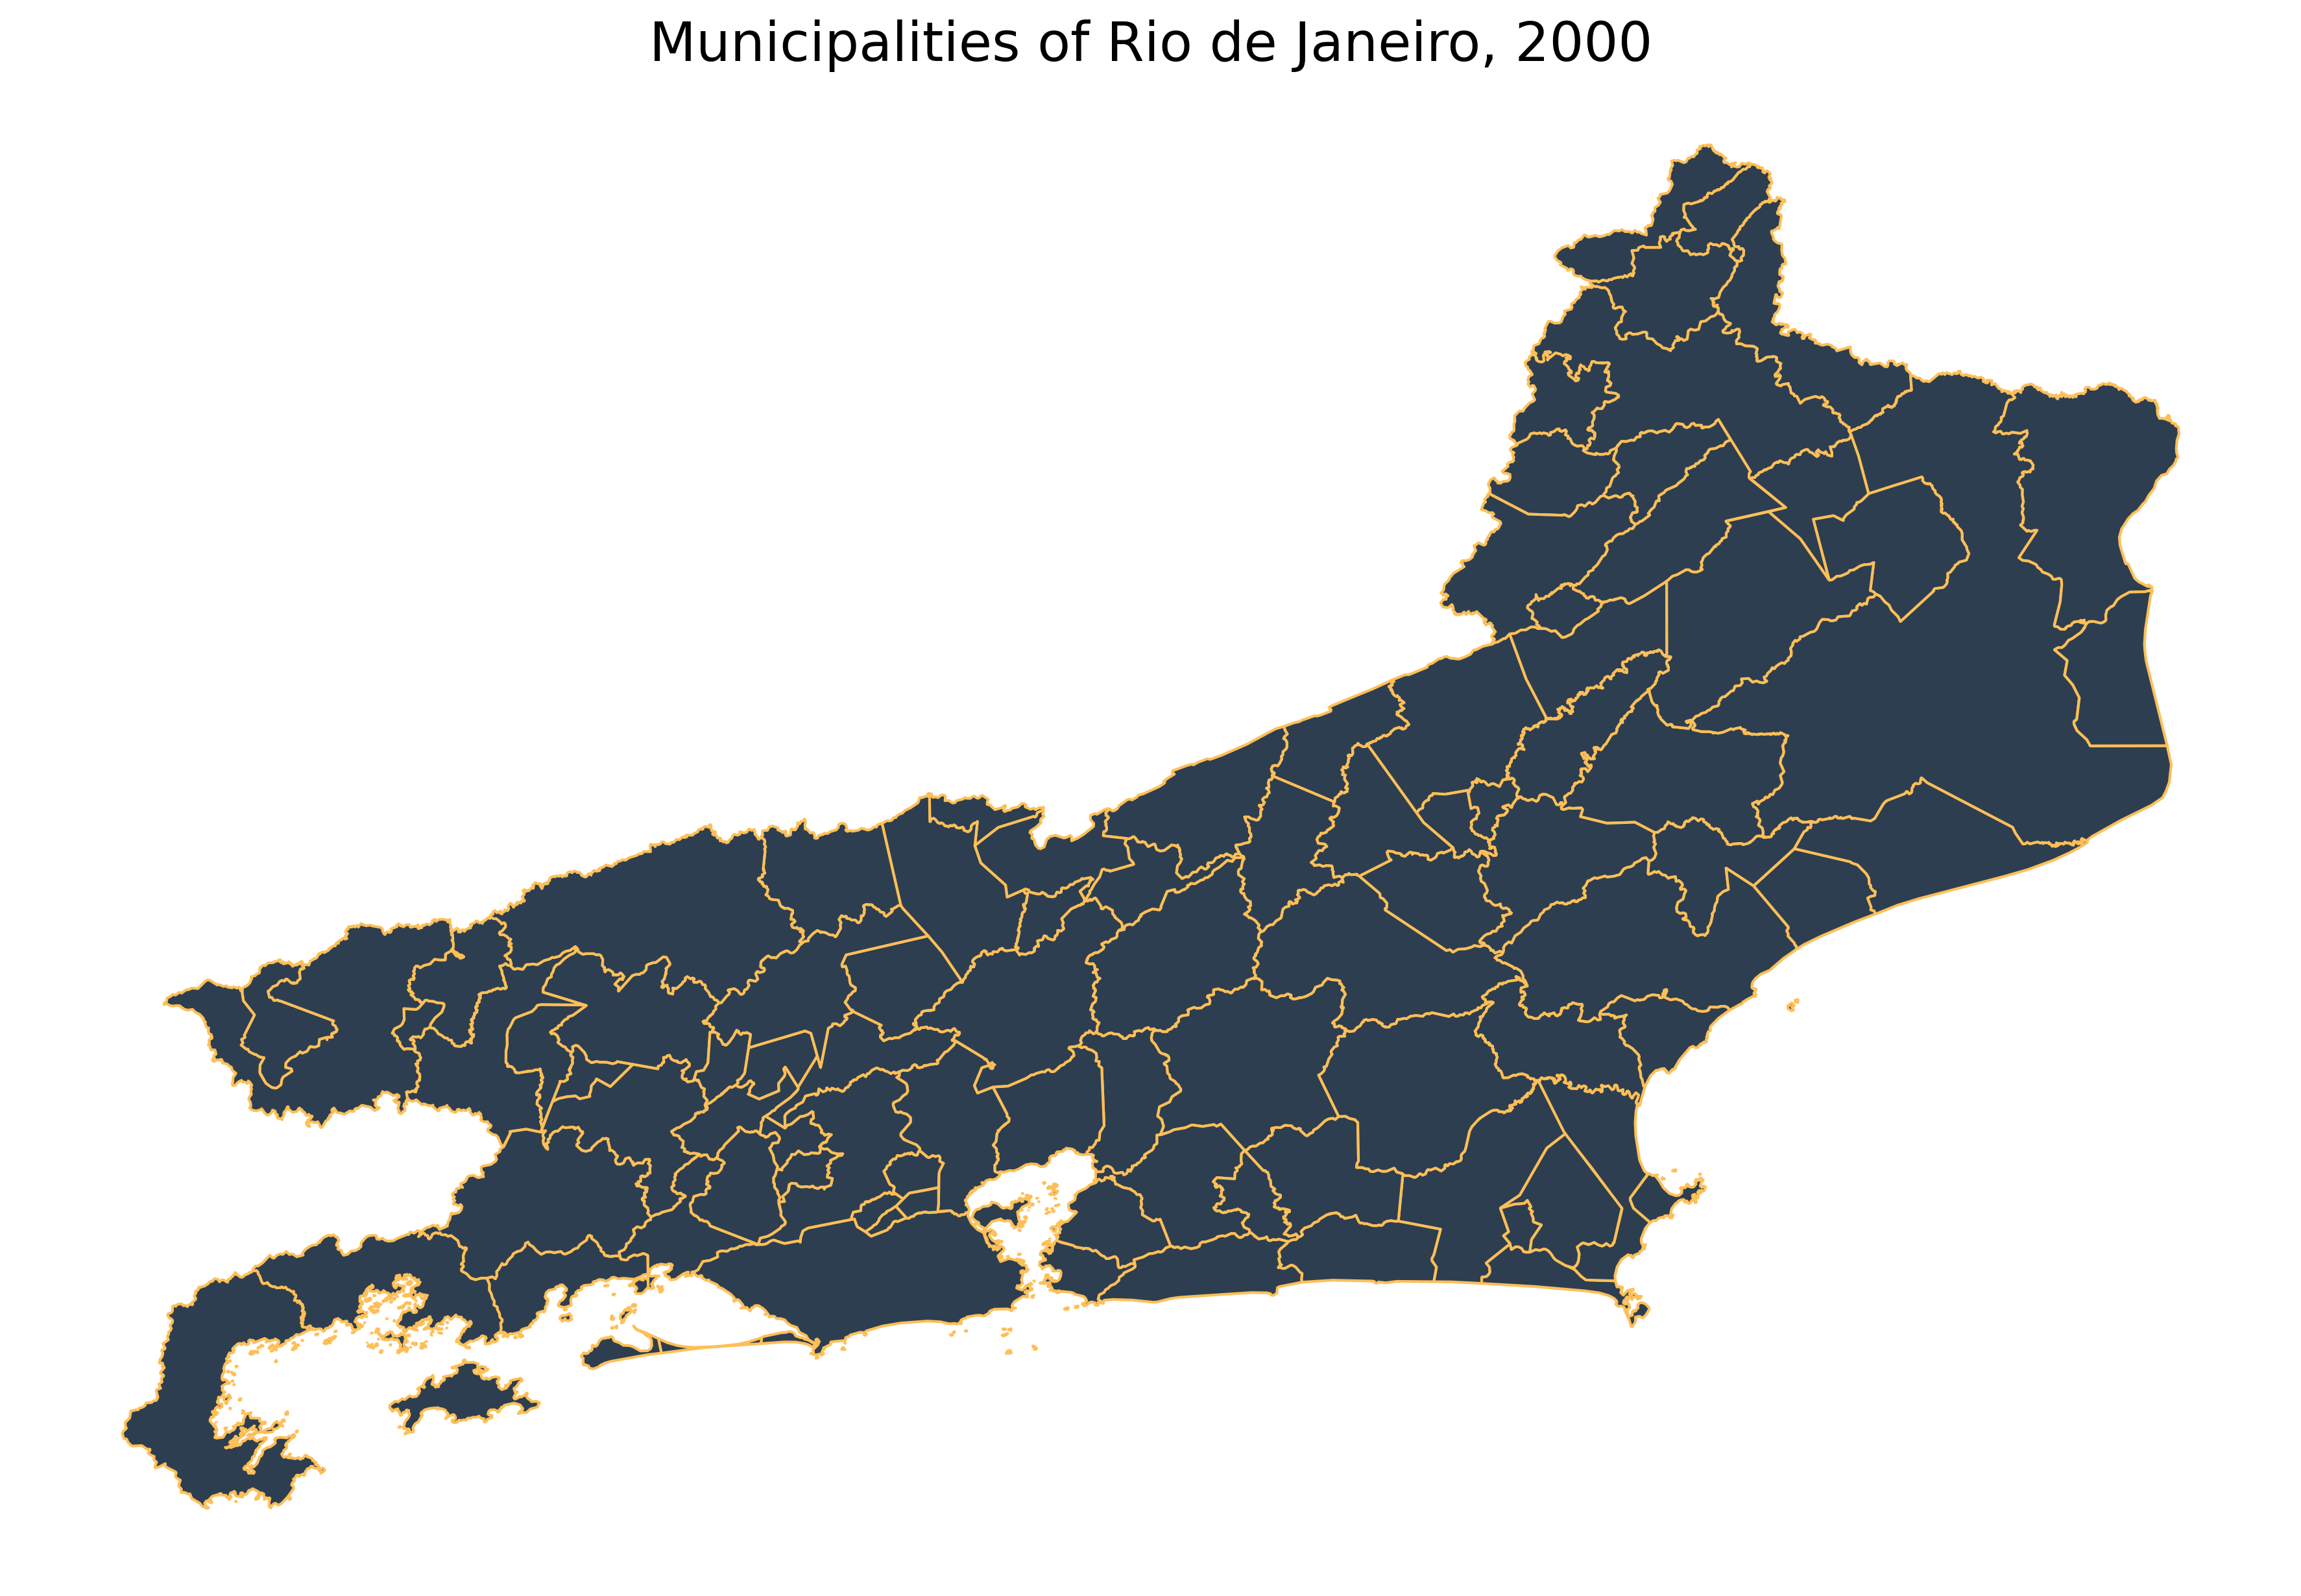

In [8]:
# plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

all_muni.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("Municipalities of Rio de Janeiro, 2000", fontsize=20)
ax.axis("off")

## Thematic maps

The next step is to combine  data from ***geobr*** package with other data sets to create thematic maps. In this example, we will be using data from the (Atlas of Human Development [(a project of our colleagues at Ipea)](https://atlasbrasil.org.br/) to create a choropleth map showing the spatial variation of Life Expectancy at birth across Brazilian states.

#### Merge external data

First, we need a `DataFrame` with estimates of Life Expectancy and merge it to our spatial database. The two-digit abbreviation of state name is our key column to join these two databases.

In [9]:
# Read DataFrame with life expectancy data
data_url = "https://raw.githubusercontent.com/ipeaGIT/geobr/master/r-package/inst/extdata/br_states_lifexpect2017.csv"

df = pd.read_csv(data_url, index_col=0)

states["name_state"] = states["name_state"].str.lower()
df["uf"] = df["uf"].str.lower()

# join the databases
states = states.merge(df, how="left", left_on="name_state", right_on="uf")

#### Plot thematic map

(-76.24758052684999,
 -26.590708254149995,
 -35.70232894755864,
 7.222992030731511)

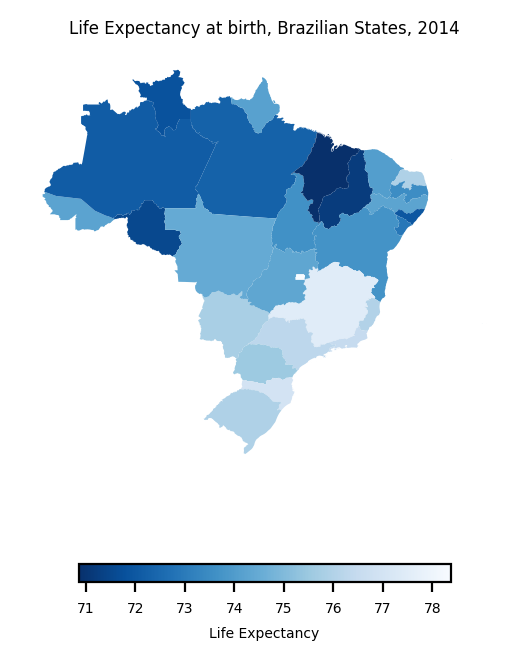

In [10]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states.plot(
    column="ESPVIDA2017",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Life Expectancy",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")